In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.model_selection import train_test_split
from scipy import sparse

In [74]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop,Nadam
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau
from keras.layers.merge import dot
from keras.models import Model
from keras.layers import Dropout

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from numba import jit # Compile some functions when performance is critical
import keras
from keras.initializers import RandomNormal
from keras.models import Model, load_model, save_model
from keras.layers import Embedding, Input, Dense, Concatenate, Multiply, Flatten
from keras.optimizers import Adam
import tensorflow as tf

In [5]:
data1= pd.read_csv('Dataset/BookDetails.csv')

In [6]:
data1

,Unnamed: 0,book_id,isbn,text_reviews_count,country_code,average_rating,link,authors,publisher,publication_year,image_url,ratings_count,title,genre,genre1
0,0,10365,375806814,7868,US,4.04,https://www.goodreads.com/book/show/10365.Wher...,"[{'author_id': '6810', 'role': ''}]",Yearling,2000.0,https://images.gr-assets.com/books/1166154337m...,271951,Where the Red Fern Grows,['children'],children
1,1,10959,1857993284,4324,US,3.88,https://www.goodreads.com/book/show/10959.Soph...,"[{'author_id': '1388082', 'role': ''}, {'autho...",Phoenix,1995.0,https://images.gr-assets.com/books/1343459906m...,111215,Sophie's World,['children'],children
2,2,5,043965548X,28561,US,4.53,https://www.goodreads.com/book/show/5.Harry_Po...,"[{'author_id': '1077326', 'role': ''}, {'autho...",Scholastic Inc.,2004.0,https://images.gr-assets.com/books/1499277281m...,1876252,Harry Potter and the Prisoner of Azkaban (Harr...,['children'],children
3,3,11387515,375869026,31536,US,4.43,https://www.goodreads.com/book/show/11387515-w...,"[{'author_id': '4859212', 'role': ''}]",Knopf,2012.0,https://images.gr-assets.com/books/1309285027m...,255461,Wonder (Wonder #1),"['children', 'young_adult']",children_YoungAdult
4,4,438492,64407683,3313,US,3.91,https://www.goodreads.com/book/show/438492.The...,"[{'author_id': '36746', 'role': ''}, {'author_...",HarperCollins Publishers,2000.0,https://images.gr-assets.com/books/1320705923m...,121250,The Wide Window (A Series of Unfortunate Event...,['children'],children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19288,19288,25698127,NaN,140,US,4.01,https://www.goodreads.com/book/show/25698127-y...,"[{'author_id': '14076277', 'role': ''}]",Penguin Teen Australia,2016.0,https://images.gr-assets.com/books/1433922022m...,533,Yellow,['young_adult'],YoungAdult
19289,19289,13919896,NaN,48,US,3.58,https://www.goodreads.com/book/show/13919896-g...,"[{'author_id': '4992850', 'role': ''}]",HarperTeen,2014.0,https://images.gr-assets.com/books/1369060906m...,177,Great,['young_adult'],YoungAdult
19290,19290,8129464,014132693X,229,US,4.07,https://www.goodreads.com/book/show/8129464-da...,"[{'author_id': '577975', 'role': ''}]",Puffin,2010.0,https://images.gr-assets.com/books/1338592847m...,3295,"Day of the Predator (TimeRiders, #2)",['young_adult'],YoungAdult
19291,19291,10860716,1554683394,78,US,3.84,https://www.goodreads.com/book/show/10860716-t...,"[{'author_id': '88922', 'role': ''}]",HarperCollins Canada,2011.0,https://images.gr-assets.com/books/1339611157m...,258,This Dark Endeavor (The Apprenticeship of Vict...,['young_adult'],YoungAdult


In [7]:
book = data1[['book_id','text_reviews_count','average_rating','publisher','publication_year',
             'ratings_count','genre1']]

In [8]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1
0,10365,7868,4.04,Yearling,2000.0,271951,children
1,10959,4324,3.88,Phoenix,1995.0,111215,children
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children
...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult


In [11]:
book['Pub1'] = book['publication_year']


In [12]:
book.iloc[1][7]

1995.0

In [15]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1
0,10365,7868,4.04,Yearling,2000.0,271951,children,2000.0,
1,10959,4324,3.88,Phoenix,1995.0,111215,children,1995.0,
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,
...,...,...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,


In [13]:
book["PY1"] = ""

In [16]:
for i in range(len(book)):
    if book.iloc[i][7]>=2000.0:
        book.iat[i,8]='a'
    elif book.iloc[i][7]>=1950.0 and book.iloc[i][7]<2000.0:
        book.iat[i,8]='b'
    elif book.iloc[i][7]=="NaN":
        book.iat[i,8]=''
    else:
        book.iat[i,8]='d'
        
    
        

In [17]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1
0,10365,7868,4.04,Yearling,2000.0,271951,children,2000.0,a
1,10959,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a
...,...,...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a


In [18]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1
0,10365,7868,4.04,Yearling,2000.0,271951,children,2000.0,a
1,10959,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b
2,5,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a
3,11387515,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a
4,438492,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a
...,...,...,...,...,...,...,...,...,...
19288,25698127,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a
19289,13919896,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a
19290,8129464,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a
19291,10860716,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a


In [19]:
data1= pd.read_csv('Dataset/UserInteractionV1.csv')

In [20]:
data2 = data1[['user_id','book_id','rating']]

In [21]:
data2 = data2.loc[:, ~data2.columns.str.contains('^Unnamed')]

In [22]:
users = data2.user_id.unique()
Books = data2.book_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
Bookid2idx = {o:i for i,o in enumerate(Books)}

In [23]:
data2['user_id'] = data2['user_id'].apply(lambda x: userid2idx[x])
data2['book_id'] = data2['book_id'].apply(lambda x: Bookid2idx[x])

In [24]:
book['book_id'] = book['book_id'].apply(lambda x: Bookid2idx[x])
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,a
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a
...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a


In [25]:
data1

,Unnamed: 0,book_id,Unnamed: 0.1,user_id,timestamp,rating,has_spoiler
0,0,10365,45,8842281e1d1347389f2ab93d60773d4d,2017-03-22,5,False
1,1,10365,9550,55475556ab32863fed66cb94a404af71,2013-01-27,5,False
2,2,10365,44316,e323acfc7b38cab03e68fb74bc32da45,2015-05-28,5,False
3,3,10365,62420,b85e8348c1e1f6ed6ae8e76bb6de7f15,2011-05-20,5,False
4,4,10365,68963,df7068f85819b1d0bd6b4ed20096692d,2011-11-13,5,False
...,...,...,...,...,...,...,...
1114794,1114794,35383830,1048804,79addbe68a26cbd8baa27e3b067a7b25,2017-10-25,4,False
1114795,1114795,35383830,1059546,be9de9603d71beb5b964a80dc6fc4778,2017-08-17,4,True
1114796,1114796,35383830,1109274,06ca020a59e70d460b5644588fdb2c20,2017-07-22,5,False
1114797,1114797,35383830,1151507,8481f58b5d184a4cc6d362e390ab2079,2017-10-23,4,True


In [26]:
book['features_genre'] = book['genre1']

In [27]:
book['features_genre'] = book['features_genre'].map(lambda x: x.split('_'))

In [28]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,a,[children]
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b,[children]
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a,[children]
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a,"[children, YoungAdult]"
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a,[children]
...,...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a,[YoungAdult]
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a,[YoungAdult]
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a,[YoungAdult]
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a,[YoungAdult]


In [29]:
book['PY1'] = book['PY1'].map(lambda x: x)

In [30]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,a,[children]
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,b,[children]
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,a,[children]
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,a,"[children, YoungAdult]"
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,a,[children]
...,...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,a,[YoungAdult]
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,a,[YoungAdult]
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,a,[YoungAdult]
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,a,[YoungAdult]


In [31]:
all_genres = set()
for row in book['features_genre']:
    # Union of sets is declared with the | operator
    all_genres = all_genres | set(row)
#all_genres.remove('') # Drop the empty genre

def invert_dict(d):
    return {value: key for key, value in d.items()}

all_genres = sorted(list(all_genres)) # We convert it to a list to enforce alphabetic ordering
ngenres = len(all_genres)

idx2genre = dict(enumerate(all_genres)) # Create a mapping dictionary from index to dict
genre2idx = invert_dict(idx2genre) # Inverse dict

genre2idx

{'YoungAdult': 0,
 'biography': 1,
 'children': 2,
 'comics-graphic': 3,
 'crime': 4,
 'fantasy': 5,
 'history': 6,
 'mystery': 7,
 'paranormal': 8,
 'poetry': 9,
 'romance': 10,
 'thriller': 11}

In [32]:
all_year = set()
for row in book['PY1']:
    # Union of sets is declared with the | operator
    all_year = all_year | set(row)
#all_genres.remove('') # Drop the empty genre

def invert_dict(d):
    return {value: key for key, value in d.items()}

all_year = sorted(list(all_year)) # We convert it to a list to enforce alphabetic ordering
nyear = len(all_year)

idx2year= dict(enumerate(all_year)) # Create a mapping dictionary from index to dict
year2idx = invert_dict(idx2year) # Inverse dict

year2idx

{'a': 0, 'b': 1, 'd': 2}

In [33]:
def encode_genres(genres):
    out = np.zeros(ngenres)
    for genre in genres:
        if genre == '':
            pass
        else:
            out[genre2idx[genre]] = 1
    return out.tolist()
book['features_genre'] = book['features_genre'].map(encode_genres)
book['features_genre']

0        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
19288    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19289    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19290    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19291    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19292    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: features_genre, Length: 19293, dtype: object

In [34]:
def encode_year(years):
    out = np.zeros(nyear)
    for year in years:
        if year == '':
            pass
        else:
            out[year2idx[year]] = 1
    return out.tolist()
book['PY1'] = book['PY1'].map(encode_year)
book['PY1']

0        [1.0, 0.0, 0.0]
1        [0.0, 1.0, 0.0]
2        [1.0, 0.0, 0.0]
3        [1.0, 0.0, 0.0]
4        [1.0, 0.0, 0.0]
              ...       
19288    [1.0, 0.0, 0.0]
19289    [1.0, 0.0, 0.0]
19290    [1.0, 0.0, 0.0]
19291    [1.0, 0.0, 0.0]
19292    [1.0, 0.0, 0.0]
Name: PY1, Length: 19293, dtype: object

In [35]:
book

,book_id,text_reviews_count,average_rating,publisher,publication_year,ratings_count,genre1,Pub1,PY1,features_genre
0,0,7868,4.04,Yearling,2000.0,271951,children,2000.0,"[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,4324,3.88,Phoenix,1995.0,111215,children,1995.0,"[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,28561,4.53,Scholastic Inc.,2004.0,1876252,children,2004.0,"[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,31536,4.43,Knopf,2012.0,255461,children_YoungAdult,2012.0,"[1.0, 0.0, 0.0]","[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,3313,3.91,HarperCollins Publishers,2000.0,121250,children,2000.0,"[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
19288,19288,140,4.01,Penguin Teen Australia,2016.0,533,YoungAdult,2016.0,"[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19289,19289,48,3.58,HarperTeen,2014.0,177,YoungAdult,2014.0,"[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19290,19290,229,4.07,Puffin,2010.0,3295,YoungAdult,2010.0,"[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19291,19291,78,3.84,HarperCollins Canada,2011.0,258,YoungAdult,2011.0,"[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
#n_feats = len(book['features_genre'].iloc[0])

In [ ]:
#n_feats

In [36]:
data2 = data2.join(book['features_genre'], on = 'book_id').dropna()

In [37]:
data2=data2.join(book['PY1'], on = 'book_id').dropna()

In [38]:
data=data2

In [39]:
data

,user_id,book_id,rating,features_genre,PY1
0,0,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
1,1,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
2,2,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
3,3,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
4,4,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
...,...,...,...,...,...
1114794,10800,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
1114795,11917,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
1114796,5572,19292,5,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"
1114797,11417,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]"


In [40]:
data['features'] = data['features_genre'] + data['PY1']

In [41]:
data

,user_id,book_id,rating,features_genre,PY1,features
0,0,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
1114794,10800,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114795,11917,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114796,5572,19292,5,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114797,11417,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [42]:
n_feats = len(data['features'].iloc[0])

In [43]:
n_feats

15

In [44]:
data=data.drop(['features_genre', 'PY1'], axis=1)

In [45]:
data

,user_id,book_id,rating,features
0,0,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,0,5,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
1114794,10800,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114795,11917,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114796,5572,19292,5,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1114797,11417,19292,4,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [46]:
from sklearn.utils import shuffle
data4=data

In [47]:
data=shuffle(data)

In [48]:
x0 = data['user_id'].to_numpy()
x1 =data['book_id'].to_numpy()

In [49]:
x2 = np.stack(data['features'].to_numpy())

In [50]:
y = data['rating'].to_numpy()

In [59]:
def get_model(num_users, num_items, num_item_feats, mf_dim, layers=[64, 32, 16, 8]):
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
    feats_input = Input(shape=(num_item_feats,), dtype='float32', name = 'feats_input')

    # User&Item Embeddings for Matrix Factorization
    MF_Embedding_User = Embedding(input_dim = num_users + 1, output_dim = mf_dim,
                                  name = 'user_embedding',
                                  embeddings_initializer = RandomNormal(stddev=0.001),
                                  input_length = 1)
    MF_Embedding_Item = Embedding(input_dim = num_items + 1, output_dim = mf_dim,
                                  name = 'item_embedding',
                                  embeddings_initializer = RandomNormal(stddev=0.001),
                                  input_length = 1)
    
    # User&Item Embeddings for MLP part
    #MLP_Embedding_User = Embedding(input_dim = num_users + 1, output_dim = int(layers[0] / 2),
                                   #name = 'mlp_embedding_user',
                                  # embeddings_initializer = RandomNormal(stddev=0.001),
                                   #input_length = 1)
   # MLP_Embedding_Item = Embedding(input_dim = num_items + 1, output_dim = int(layers[0] / 2),
                                   #name = 'mlp_embedding_item',
                                   #embeddings_initializer = RandomNormal(stddev=0.001),
                                   #input_length = 1) 
    
    mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    mf_vector =dot([mf_user_latent, mf_item_latent],axes=1)
       

    # MLP part with item features
    #mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    #mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    
    mlp_vector = Concatenate()([mf_vector, feats_input])
    for l in layers:
        layer = Dense(l, activation='relu')
        mlp_vector = layer(mlp_vector)

    # Concatenate MF and MLP parts
    #predict_vector = Concatenate()([mf_vector, mlp_vector])
    
    prediction_1=Dense(8, activation = 'relu')(mlp_vector)
    #prediction_2=Dense(2, activation = 'relu')(prediction_1)
    # Final prediction layer
    prediction = Dense(1, activation = 'relu',
                       kernel_initializer = 'lecun_uniform',
                       name = 'prediction')(prediction_1)
    
    model = Model(input = [user_input, item_input, feats_input], output = prediction)
    return model

In [52]:
def getData(k,i):
    l=len(data4)
    l1=int(l/k)
    j=l1*(i+1)
    i=l1*i
    x0_val=x0[i:j]
    x1_val=x1[i:j]
    x2_val=x2[i:j]
    y_val=y[i:j]
    
    if i==0:
        x0_train=x0[j:l]
        x1_train=x1[j:l]
        x2_train=x2[j:l]
        y_train=y[j:l]
    elif i==k-1:
        x0_train=x0[0:i]
        x1_train=x1[0:i]
        x2_train=x2[0:i]
        y_train=y[0:i]
    else:
        x0_train=np.concatenate((x0[0:i],x0[j:l]))
        x1_train=np.concatenate((x1[0:i],x1[j:l]))
        x2_train=np.concatenate((x2[0:i],x2[j:l]))
        y_train=np.concatenate((y[0:i],y[j:l]))    
              
    x_train=[x0_train,x1_train,x2_train]
    x_val=[x0_val,x1_val,x2_val]
    
    return x_train,y_train,x_val,y_val

In [67]:
learning_rate = 0.01
batch_size = 256
#n_epochs = 20
mf_dim = 50
layers = [12]
n_users=len(users)
n_book=len(Books)
n_folds=5

In [54]:
def root_mean_squared_error(y_train, y_val):
        return K.sqrt(K.mean(K.square(y_val - y_train))) 

In [61]:
model = get_model(n_users, n_book, n_feats, mf_dim, layers)

In [68]:
for i in range(n_folds):
    print("Training on Fold: ",i+1)
    
    x_train,y_train,x_val,y_val=getData(n_folds,i)
    
    model = None
    model = get_model(n_users, n_book, n_feats, mf_dim, layers)
    model.compile(optimizer = 
                  Adam(lr = 0.001), loss =root_mean_squared_error)
    results = model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val),
                 batch_size = batch_size, epochs = 3, verbose = True)
    print("Val Score: ", model.evaluate(x_val, y_val))

Training on Fold:  1
Train on 891840 samples, validate on 222959 samples
Epoch 1/3
891840/891840 [==============================] - 36s 40us/step - loss: 1.2696 - val_loss: 1.1280
Epoch 2/3
891840/891840 [==============================] - 34s 38us/step - loss: 0.9365 - val_loss: 1.1706
Epoch 3/3
222959/222959 [==============================] - 3s 13us/step
Val Score:  1.2112879269263983
Training on Fold:  2
Train on 891840 samples, validate on 222959 samples
Epoch 1/3
891840/891840 [==============================] - 36s 40us/step - loss: 1.2585 - val_loss: 1.1335
Epoch 2/3
891840/891840 [==============================] - 34s 38us/step - loss: 0.9338 - val_loss: 1.1734
Epoch 3/3
222959/222959 [==============================] - 3s 12us/step
Val Score:  1.2117990650631358
Training on Fold:  3
Train on 891840 samples, validate on 222959 samples
Epoch 1/3
891840/891840 [==============================] - 34s 38us/step - loss: 1.2502 - val_loss: 1.1282
Epoch 2/3
891840/891840 [===============

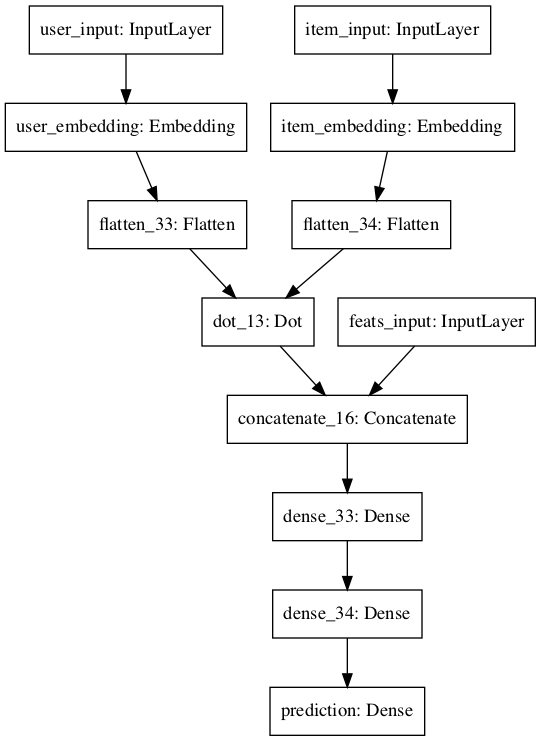

In [69]:
from keras.utils import plot_model
plot_model(model, to_file='model_v2.png')

In [70]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        934450      user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 50)        964700      item_input[0][0]                 
___________________________________________________________________________________________

In [ ]:
learning_rate = 0.001
batch_size = 128
#n_epochs = 20
mf_dim = 50
layers = [64,32, 16, 8]
n_users=len(users)
n_book=len(Books)


In [83]:
def get_model(num_users, num_items, num_item_feats, mf_dim, layers=[64, 32, 16, 8]):
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')
    feats_input = Input(shape=(num_item_feats,), dtype='float32', name = 'feats_input')

    # User&Item Embeddings for Matrix Factorization
    MF_Embedding_User = Embedding(input_dim = num_users + 1, output_dim = mf_dim,
                                  name = 'user_embedding',
                                  embeddings_initializer = RandomNormal(stddev=0.001),
                                  input_length = 1)
    MF_Embedding_Item = Embedding(input_dim = num_items + 1, output_dim = mf_dim,
                                  name = 'item_embedding',
                                  embeddings_initializer = RandomNormal(stddev=0.001),
                                  input_length = 1)
    
    # User&Item Embeddings for MLP part
    #MLP_Embedding_User = Embedding(input_dim = num_users + 1, output_dim = int(layers[0] / 2),
                                   #name = 'mlp_embedding_user',
                                  # embeddings_initializer = RandomNormal(stddev=0.001),
                                   #input_length = 1)
   # MLP_Embedding_Item = Embedding(input_dim = num_items + 1, output_dim = int(layers[0] / 2),
                                   #name = 'mlp_embedding_item',
                                   #embeddings_initializer = RandomNormal(stddev=0.001),
                                   #input_length = 1) 
    
    mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    mf_vector =Concatenate()([mf_user_latent, mf_item_latent])
    mf_vector=Dense(96,activation='relu')(mf_vector)
    mf_vector=Dropout(0.4)(mf_vector)

    # MLP part with item features
    #mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    #mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    
    mlp_vector = Concatenate()([mf_vector, feats_input])
    for l in layers:
        layer = Dense(l, activation='relu')
        mlp_vector = layer(mlp_vector)

    # Concatenate MF and MLP parts
    #predict_vector = Concatenate()([mf_vector, mlp_vector])
    
    prediction_1=Dense(4, activation = 'relu')(mlp_vector)
    #prediction_2=Dense(2, activation = 'relu')(prediction_1)
    # Final prediction layer
    prediction = Dense(1, activation = 'relu',
                       kernel_initializer = 'lecun_uniform',
                       name = 'prediction')(prediction_1)
    
    model = Model(input = [user_input, item_input, feats_input], output = prediction)
    return model

In [86]:
learning_rate = 0.001
batch_size = 128
#n_epochs = 20
mf_dim = 50
layers = [64,32, 16, 8]
n_users=len(users)
n_book=len(Books)



In [88]:
n_folds=10
for i in range(n_folds):
    print("Training on Fold: ",i+1)
    
    x_train,y_train,x_val,y_val=getData(n_folds,i)
    
    model = None
    model = get_model(n_users, n_book, n_feats, mf_dim, layers)
    model.compile(optimizer = 
                  Adam(lr = 0.001), loss =root_mean_squared_error)
    results = model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val),
                 batch_size = batch_size, epochs = 10, verbose = True)
    print("Val Score: ", model.evaluate(x_val, y_val))

Training on Fold:  1
Train on 1003320 samples, validate on 111479 samples
Epoch 1/10
1003320/1003320 [==============================] - 85s 85us/step - loss: 1.1418 - val_loss: 1.0917
Epoch 2/10
1003320/1003320 [==============================] - 90s 89us/step - loss: 1.0691 - val_loss: 1.0862
Epoch 3/10
1003320/1003320 [==============================] - 89s 89us/step - loss: 1.0470 - val_loss: 1.0802
Epoch 4/10
1003320/1003320 [==============================] - 92s 92us/step - loss: 1.0257 - val_loss: 1.0806
Epoch 5/10
1003320/1003320 [==============================] - 94s 94us/step - loss: 1.0047 - val_loss: 1.0873
Epoch 6/10
1003320/1003320 [==============================] - 103s 102us/step - loss: 0.9844 - val_loss: 1.0943
Epoch 7/10
1003320/1003320 [==============================] - 110s 109us/step - loss: 0.9666 - val_loss: 1.0987
Epoch 8/10
1003320/1003320 [==============================] - 105s 105us/step - loss: 0.9491 - val_loss: 1.1088
Epoch 9/10
1003320/1003320 [============

1003320/1003320 [==============================] - 85s 85us/step - loss: 1.0009 - val_loss: 1.0839
Epoch 6/10
1003320/1003320 [==============================] - 85s 84us/step - loss: 0.9817 - val_loss: 1.0850
Epoch 7/10
1003320/1003320 [==============================] - 87s 87us/step - loss: 0.9641 - val_loss: 1.0886
Epoch 8/10
1003320/1003320 [==============================] - 82s 82us/step - loss: 0.9483 - val_loss: 1.0979
Epoch 9/10
1003320/1003320 [==============================] - 80s 80us/step - loss: 0.9324 - val_loss: 1.1010
Epoch 10/10
111479/111479 [==============================] - 2s 15us/step
Val Score:  1.0953814099481067
Training on Fold:  8
Train on 1003320 samples, validate on 111479 samples
Epoch 1/10
1003320/1003320 [==============================] - 80s 80us/step - loss: 1.1281 - val_loss: 1.0863
Epoch 2/10
1003320/1003320 [==============================] - 79s 79us/step - loss: 1.0683 - val_loss: 1.0772
Epoch 3/10
1003320/1003320 [==============================] - 

In [89]:
model.summary()

Model: "model_36"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        934450      user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 50)        964700      item_input[0][0]                 
___________________________________________________________________________________________